In [1]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')
odf=df.copy()
odf=odf.drop(['HeartDisease'],axis=1)
df1=df.copy()
odf.head()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.Oldpeak.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
list=['RestingBP','Cholesterol','Oldpeak','MaxHR']
print(df.shape)
for column in list:
    df['zscore']=(df[column]-df[column].mean())/df[column].std()
    df=df.loc[(df['zscore']<3) & (df['zscore']>-3)]
    df=df.drop(['zscore'],axis=1)
print(df.shape)     

df.head()

        

(918, 12)
(899, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
arr=np.array(df.dtypes)
type(arr[0])

numpy.dtype[int64]

In [7]:
list=[]
for i in range(len(arr)):
    if(arr[i]==np.dtype('O')):
        list.append(df.columns[i])
print(list)
for column in list:
    tdf=pd.get_dummies(df[column]).astype(int)
    df=pd.concat([df,tdf],axis=1)
    df.drop([column],axis=1,inplace=True)
df.shape
tdf=df.copy()
df.head()
    

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [8]:
X=df.drop(['HeartDisease'],axis=1).values
x=X.copy()

Xdf=df.drop(['HeartDisease'],axis=1)
Y=df['HeartDisease'].values
y=Y.copy()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[-1.42815446,  0.46590022,  0.84963584, ..., -0.26018448,
        -0.99888827,  1.13469459],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.26018448,
         1.00111297, -0.88129441],
       [-1.7455875 , -0.1185065 ,  0.79361247, ..., -0.26018448,
        -0.99888827,  1.13469459],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ..., -0.26018448,
         1.00111297, -0.88129441],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ..., -0.26018448,
         1.00111297, -0.88129441],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.26018448,
        -0.99888827,  1.13469459]])

In [9]:
from sklearn.decomposition import PCA
pca=PCA(.9)
X=pca.fit_transform(X_scaled)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
X.shape

(899, 12)

In [10]:
model_params={
    'svm':{
            'model': SVC(gamma='auto'),
            'params':{
                    'kernel':('linear','poly','rbf')
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(n_estimators=2),
        'params':{
            'n_estimators':range(1,4)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
    
}

In [11]:
earr,earr1,earr2=[],[],[]
dict={
        "model":earr,
        "Params":earr1,
        "Score":earr2
    }

from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

for model_name,mp in model_params.items():
    clf =GridSearchCV( mp['model'],mp['params'],cv=3,return_train_score=False)
    clf.fit(X_train,Y_train)
    earr.append(model_name)
    earr1.append(clf.best_params_)
    earr2.append(clf.best_score_)
df=pd.DataFrame(dict,columns=["model","Params","Score"])
df

,model,Params,Score
0,svm,{'kernel': 'linear'},0.883147
1,random_forest,{'n_estimators': 3},0.849779
2,logistic_regression,{'C': 5},0.883159


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X=tdf.drop(['HeartDisease'],axis=1).values
Y=tdf['HeartDisease'].values
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),PCA(0.9),SVC(gamma="auto",kernel="linear"))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

clf.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score 
cross_val_score(clf,X_train,y_train,cv=3,scoring='accuracy')


array([0.8375    , 0.85      , 0.87866109])

In [13]:

import pickle
pickle.dump(clf,open('clf.pkl','wb'))

In [14]:
import json

columns={
    'data_columns':[col for col in Xdf.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))


In [15]:
columns2={
    'data_columns':[col for col in odf.columns]
}
with open("original_columns.json",'w') as f:
    f.write(json.dumps(columns2))

In [16]:
X_test[0]

array([ 66., 140., 139.,   0.,  94.,   1.,   0.,   1.,   1.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.])

In [19]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, clf.predict(X_test))
conf_matrix


array([[64, 11],
       [12, 93]], dtype=int64)

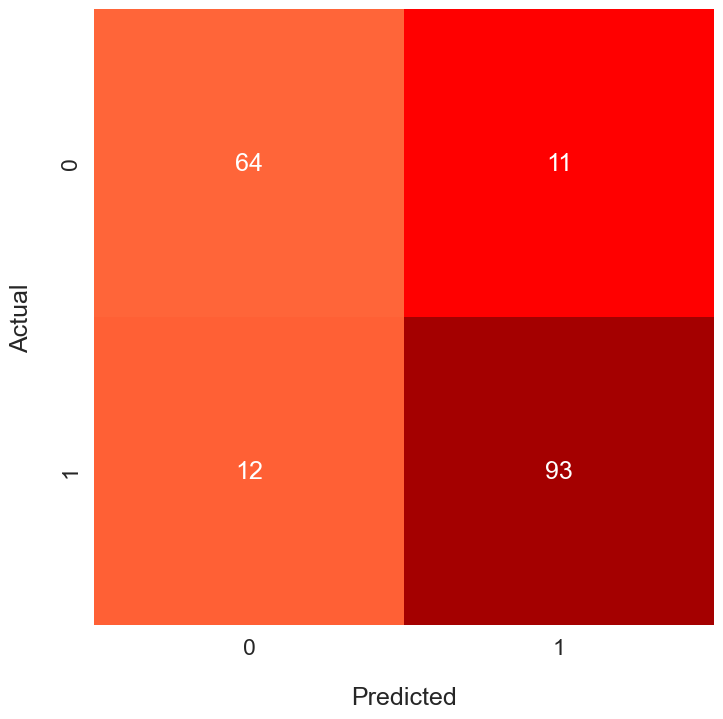

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()